In [155]:
import numpy as np
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
import pandas as pd
from scipy import stats
from functools import reduce



##### load data

In [156]:
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])
'''data_dist = ms_data.copy()
data_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)
data_dist['median']= data_dist.apply(lambda row:row[:-1].median(), axis=1)
data_dist['mean']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)
data_norm = data_dist.apply(lambda row: row[:-3]/row['mean'],axis=1)
data_norm.index = data_dist.index
data_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)
ms_data = data_norm2'''

'data_dist = ms_data.copy()\ndata_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)\ndata_dist[\'median\']= data_dist.apply(lambda row:row[:-1].median(), axis=1)\ndata_dist[\'mean\']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)\ndata_norm = data_dist.apply(lambda row: row[:-3]/row[\'mean\'],axis=1)\ndata_norm.index = data_dist.index\ndata_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)\nms_data = data_norm2'

In [3]:
'''import numpy as np
df = ms_data
scaled_data = 3 * ((df - df.mean()) / df.std())

# Clip values to be within -3 and 3
scaled_data = np.clip(scaled_data, -3, 3)

# Check mean and standard deviation
print(scaled_data.mean())
print(scaled_data.std())
print(scaled_data.min(), scaled_data.max())

'''

6485-40-1     -0.435880
3033-23-6      0.075711
21284-22-0    -0.418053
38427-78-0    -0.383695
495-61-4      -0.413705
                 ...   
713-95-1      -0.224200
20307-84-0    -0.413705
120021-96-7   -0.413705
586-62-9      -0.325871
710-04-3      -0.163435
Length: 732, dtype: float64
6485-40-1      1.894324
3033-23-6      2.302065
21284-22-0     1.891729
38427-78-0     2.084914
495-61-4       2.058207
                 ...   
713-95-1       2.258621
20307-84-0     2.058207
120021-96-7    2.058207
586-62-9       2.155720
710-04-3       1.986596
Length: 732, dtype: float64
6485-40-1     -3.0
3033-23-6     -3.0
21284-22-0    -3.0
38427-78-0    -3.0
495-61-4      -3.0
              ... 
713-95-1      -3.0
20307-84-0    -3.0
120021-96-7   -3.0
586-62-9      -3.0
710-04-3      -3.0
Length: 732, dtype: float64 6485-40-1      3.0
3033-23-6      3.0
21284-22-0     3.0
38427-78-0     3.0
495-61-4       3.0
              ... 
713-95-1       3.0
20307-84-0     3.0
120021-96-7    3.0
586-62-9

In [157]:
# filter cas numbers with no intenisties over all samples
zeros = ms_data.columns[ms_data.eq(0).all()]
ms_data= ms_data.drop(zeros, axis=1)

In [158]:
ms_data = stats.zscore(ms_data)

In [159]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [160]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [161]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol = CAS_to_mol[~CAS_to_mol['CAS'].isin(zeros)]

In [162]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [163]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

In [164]:
sweet_ms_df = ms_data_comp[sweet_descriptors_CAS]

### Basic example

In [9]:
cas_range=np.linspace(-3,3,197)
#cas_range = np.array(ms_data_comp['6485-40-1'])
             
cas_001 = ctrl.Antecedent(cas_range, 'cas_001')
cas_002 = ctrl.Antecedent(cas_range, 'cas_002')
cas_003 = ctrl.Antecedent(cas_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(3)
cas_002.automf(3)
cas_003.automf(3)

osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
# tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
# tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
# tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

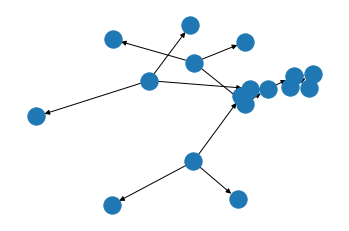

In [70]:
rule_sweet_01 = (ctrl.Rule(cas_001['good'] | cas_002['good'] |cas_003['good'], osa_sweet['good']))
rule_sweet_02 = (ctrl.Rule(cas_001['average']|  cas_002['average'] | cas_003['average'], osa_sweet['average']))
rule_sweet_03 = (ctrl.Rule(cas_001['poor']| cas_002['poor'] |cas_003['poor'], osa_sweet['poor']))

rule_sweet_01.view()

cas_001 : 3
cas_002 : 3
cas_003 : 3

74.6341463414634


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


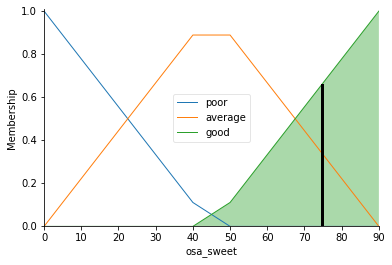

In [71]:
tipping_ctrl = ctrl.ControlSystem([
    rule_sweet_01,
    rule_sweet_02,
    rule_sweet_03
])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


tipping.input['cas_001'] = 3
tipping.input['cas_002'] = 3
tipping.input['cas_003'] = 3

print(tipping.input)
# Crunch the numbers
tipping.compute()

prediction = tipping.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=tipping)

### Sweet cw

In [537]:
sweet_ms_df = ms_data_comp[sweet_descriptors_CAS]

In [542]:
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    cas_antecedents.append( cas_antecedent) 

osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet.automf(3)


rules: 

if one sweet cas is good than contributes to osa good

analog with average an poor

In [ ]:
'''rule_sweet = ctrl.Rule(create_rules('good'), osa_sweet['good'])
rule_average = ctrl.Rule(create_rules('average'), osa_sweet['average'])
rule_low = ctrl.Rule(create_rules('poor'), osa_sweet['poor'])

rules = ctrl.ControlSystem([
    rule_sweet,
    rule_average,
    rule_low
])
fuzzy_ctrl = ctrl.ControlSystemSimulation(rules)
'''

In [544]:
# define some rules 
one_good =  reduce(lambda x, y: x | y, [ caa['good'] for caa in cas_antecedents])
one_avg =  reduce(lambda x, y: x | y, [ caa['average'] for caa in cas_antecedents])

all_poor =  reduce(lambda x, y: x & y, [ caa['poor'] for caa in cas_antecedents])
all_avg =  reduce(lambda x, y: x & y, [ caa['average'] for caa in cas_antecedents])

rules = [    
    ctrl.Rule( all_poor, osa_sweet['poor']   ),
    ctrl.Rule( all_avg, osa_sweet['average'] ),
    ctrl.Rule( one_good, osa_sweet['good']   ),
]

In [545]:
# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rules)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [560]:
ms_data = stats.zscore(ms_data_comp,axis=0)
predictions = []
for index, row in ms_data.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
       

In [562]:
sweet_ms_df_zscore = stats.zscore(sweet_ms_df, axis = 0)

In [563]:
for index,entry in sweet_ms_df_zscore.loc['000656'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = stats.zscore(panelist_data_comp).loc['000565']['Sweet']
       

panelist score for sweet:  0.06709556249758704
prediction score for sweet:  0.6783272961770778


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


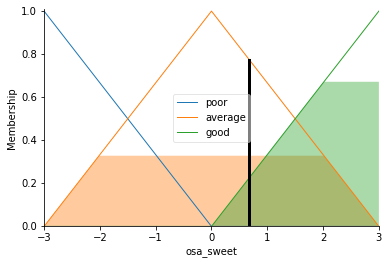

In [564]:
print("panelist score for sweet: " , references)
print("prediction score for sweet: ",predictions)

osa_sweet.view(sim=fuzzy)

In [565]:
# over all samples
predictions = []
for index, row in sweet_ms_df_zscore.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
       

(array([ 2.,  8., 24., 28., 40., 35., 20.,  0., 19., 21.]),
 array([0.09395177, 0.16665042, 0.23934907, 0.31204772, 0.38474637,
        0.45744502, 0.53014367, 0.60284232, 0.67554097, 0.74823962,
        0.82093826]),
 <BarContainer object of 10 artists>)

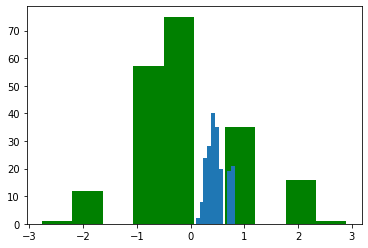

In [566]:
plt.hist(stats.zscore(references), color='g')
plt.hist(predictions)

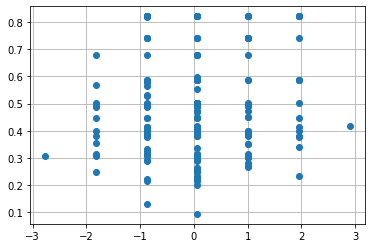

In [567]:
plt.plot(stats.zscore(references),predictions,"o")
plt.grid()

### 3 params

split each antecedent and conesequent into 3 areas


zscore from -3 to 3 and 197 values because of sample count

In [198]:
zscore_range=np.linspace(-3,3,197)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')
osa_sweet.automf(3)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


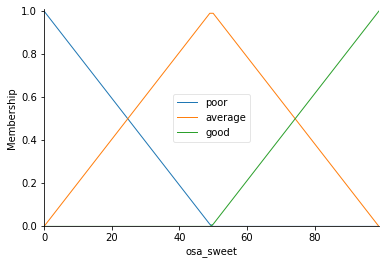

In [199]:
osa_sweet.view()

In [200]:
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))


In [201]:
# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

(array([ 2.,  5.,  6., 11.,  8.,  6.,  7.,  6.,  3.,  3.]),
 array([-1.4368161 , -1.26339784, -1.08997958, -0.91656132, -0.74314306,
        -0.5697248 , -0.39630654, -0.22288828, -0.04947002,  0.12394824,
         0.2973665 ]),
 <BarContainer object of 10 artists>)

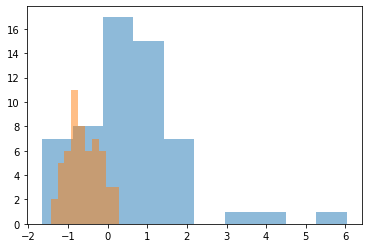

In [202]:
plt.hist(sweet_ms_df.loc['000838'],alpha =0.5) # blue with higher intensites and reference for sweet being 50 
plt.hist(sweet_ms_df.loc['000929'], alpha =0.5)

In [203]:
for index,entry in sweet_ms_df.loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  50
prediction score for sweet:  52.534800349099164


In [204]:
for index,entry in sweet_ms_df.loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  30
prediction score for sweet:  45.447826528623544


In [205]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, "predictions vs. panelist data for 'Sweet' over all comparable samples\n Correlation: -0.04368974838860558")

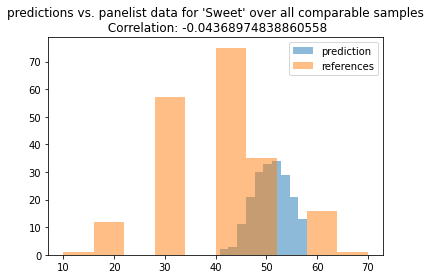

In [206]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
labels= ["prediction", "references"]
plt.legend(labels)
plt.title("predictions vs. panelist data for 'Sweet' over all comparable samples"+"\n Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

always between 40 and 60 

change zscore range to -0.5 and 0.5

In [238]:
zscore_range=np.linspace(-0.5,0.5,197)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [239]:
for index,entry in sweet_ms_df.loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)


panelist score for sweet:  50
prediction score for sweet:  49.50000000000003


In [240]:
for index,entry in sweet_ms_df.loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  30
prediction score for sweet:  47.00462071566259


In [241]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, 'Correlation: 0.01650035630269362')

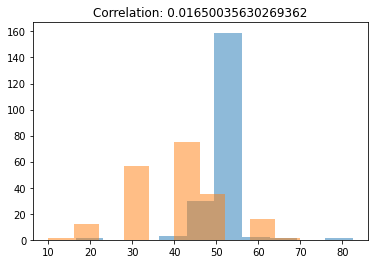

In [242]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

np.arange(0, 100, 10)

In [221]:
zscore_range=np.linspace(-0.5,0.5,197)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [222]:
for index,entry in sweet_ms_df.loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

for index,entry in sweet_ms_df.loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  50
prediction score for sweet:  45.00000000000001
panelist score for sweet:  30
prediction score for sweet:  42.75554707401083


In [223]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, 'Correlation: 0.015346840297953596')

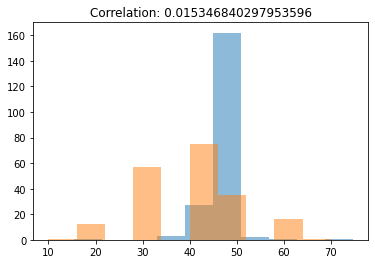

In [224]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

#### only signifant sweet cas numbers

In [227]:
sig_sweet_CAS = ['101-97-3',
 '10486-19-8',
 '106-25-2',
 '106-70-7',
 '1118-27-0',
 '112-44-7',
 '1139-30-6',
 '115-95-7',
 '1209-71-8',
 '122-78-1',
 '123-11-5',
 '123123-38-6',
 '141-16-2',
 '15051-81-7',
 '15352-77-9',
 '18679-18-0',
 '18794-84-8',
 '20407-84-5',
 '07.05.2305',
 '23267-57-4',
 '2463-77-6',
 '27538-09-6',
 '3033-23-6',
 '3779-61-1',
 '4077-47-8',
 '470-82-6',
 '4748-78-1',
 '4861-58-9',
 '502-61-4',
 '531-59-9',
 '552-02-3',
 '60066-88-8',
 '617-05-0',
 '623-42-7',
 '637-69-4',
 '6627-88-9',
 '695-06-7',
 '713-95-1',
 '73744-93-1',
 '03.12.7554',
 '90-05-1',
 '93-58-3',
 '939-48-0',
 '94-59-7',
 '95-93-2']

In [243]:
zscore_range=np.linspace(-0.5,0.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [264]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sig_sweet_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, 'Correlation: 0.04952059494612476')

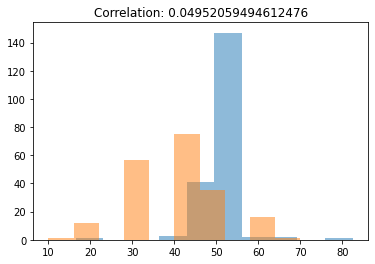

In [265]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

=> slightly better correlation

#### all new significant sweet cas numbers 

In [286]:
sig_sweet_CAS_all = ['3033-23-6',
 '876-17-5',
 '07.11.5258',
 '4128-17-0',
 '1117-52-8',
 '31501-11-8',
 '21662-09-9',
 '15456-69-6',
 '18679-18-0',
 '491-04-3',
 '562-74-3',
 '470-67-7',
 '470-82-6',
 '2497-25-8',
 '3913-71-1',
 '3913-81-3',
 '4861-58-9',
 '136954-20-6',
 '586-82-3',
 '105683-99-6',
 '147159-48-6',
 '6627-88-9',
 '531-59-9',
 '85213-22-5',
 '29887-38-5',
 '507-70-0',
 '13109-70-1',
 '465-31-6',
 '97-42-7',
 '15537-55-0',
 '106-23-0',
 '150-84-5',
 '87-91-2',
 '619-01-2',
 '20777-49-5',
 '58985-18-5',
 '128386-31-2',
 '4192-77-2',
 '3025-30-7',
 '103-36-6',
 '617-05-0',
 '1632-73-1',
 '106-24-1',
 '105-87-3',
 '3796-70-1',
 '124-76-5',
 '2756-56-1',
 '18675-35-9',
 '16750-94-0',
 '5944-20-7',
 '89-49-6',
 '498-16-8',
 '78-70-6',
 '115-95-7',
 '89-80-5',
 '10458-14-7',
 '106-25-2',
 '141-12-8',
 '29790-29-2',
 '619-62-5',
 '18479-68-0',
 '28839-13-6',
 '16721-39-4',
 '91-10-1',
 '80-26-2',
 '629-59-4',
 '17699-16-0',
 '10486-19-8',
 '14575-74-7',
 '98-55-5',
 '138-87-4',
 '07.05.2305',
 '713-95-1']

In [287]:
sig_sweet_CAS_all = [i for i in sig_sweet_CAS_all if i not in zeros]

In [288]:
# alpha = 0.001
len(sig_sweet_CAS_all)

73

In [294]:
sig_sweet_CAS_005 = ['3033-23-6',
 '21284-22-0',
 '38427-78-0',
 '495-61-4',
 '29873-99-2',
 '876-17-5',
 '4674-50-4',
 '14371-10-9',
 '106-28-5',
 '5273-85-8',
 '5932-68-3',
 '07.11.5258',
 '13474-59-4',
 '23726-91-2',
 '4128-17-0',
 '1117-52-8',
 '31501-11-8',
 '21662-09-9',
 '15456-69-6',
 '18679-18-0',
 '3790-78-1',
 '491-04-3',
 '28973-97-9',
 '562-74-3',
 '470-67-7',
 '359794-78-8',
 '470-82-6',
 '15051-81-7',
 '2497-25-8',
 '3913-71-1',
 '3913-81-3',
 '20407-84-5',
 '4861-58-9',
 '30361-28-5',
 '136954-20-6',
 '31823-43-5',
 '34318-21-3',
 '586-82-3',
 '38284-27-4',
 '19872-52-7',
 '698-76-0',
 '105683-99-6',
 '147159-48-6',
 '6627-88-9',
 '531-59-9',
 '698-10-2',
 '85213-22-5',
 '25246-27-9',
 '489-39-4',
 '29887-38-5',
 '18607-93-7',
 '103-37-7',
 '24703-35-3',
 '28588-75-2',
 '507-70-0',
 '26927-90-2',
 '13109-70-1',
 '7492-41-3',
 '22451-73-6',
 '136-60-7',
 '106-18-3',
 '114791-16-1',
 '29837-12-5',
 '465-31-6',
 '97-42-7',
 '1139-30-6',
 '28231-03-0',
 '36653-82-4',
 '15537-55-0',
 '106-23-0',
 '150-84-5',
 '141-16-2',
 '97-89-2',
 '124-18-5',
 '69134-53-8',
 '03.12.7554',
 '123-25-1',
 '87-91-2',
 '619-01-2',
 '20777-49-5',
 '58985-18-5',
 '484-31-1',
 '4077-47-8',
 '487-11-6',
 '639-99-6',
 '128386-31-2',
 '134346-43-3',
 '23267-57-4',
 '157615-33-3',
 '4192-77-2',
 '3025-30-7',
 '110516-60-4',
 '5405-41-4',
 '103-36-6',
 '2021-28-5',
 '999-10-0',
 '101-97-3',
 '124-06-1',
 '617-05-0',
 '123123-38-6',
 '97-53-0',
 '1632-73-1',
 '19700-21-1',
 '106-24-1',
 '105-87-3',
 '3796-70-1',
 '15423-57-1',
 '23986-74-5',
 '90-05-1',
 '489-86-1',
 '544-76-3',
 '29354-98-1',
 '3681-71-8',
 '27538-10-9',
 '19888-33-6',
 '95908-33-1',
 '124-76-5',
 '1200-67-5',
 '2756-56-1',
 '118-65-0',
 '18675-35-9',
 '97-54-1',
 '16750-94-0',
 '5944-20-7',
 '18433-98-2',
 '939-48-0',
 '89-49-6',
 '498-16-8',
 '23089-26-1',
 '78-70-6',
 '115-95-7',
 '115-99-1',
 '89-80-5',
 '10458-14-7',
 '75832-79-0',
 '4630-82-4',
 '93-15-2',
 '27538-09-6',
 '1189-09-9',
 '124-10-7',
 '3943-74-6',
 '65128-99-6',
 '607-91-0',
 '106-25-2',
 '40716-66-3',
 '141-12-8',
 '629-92-5',
 '124-19-6',
 '821-55-6',
 '638-66-4',
 '593-45-3',
 '65767-22-8',
 '29790-29-2',
 '619-62-5',
 '501-98-4',
 '18479-68-0',
 '28839-13-6',
 '09.11.2765',
 '502-69-2',
 '97-47-3',
 '16721-39-4',
 '5471-51-2',
 '73744-93-1',
 '6750-60-3',
 '112-92-5',
 '91-10-1',
 '19912-62-0',
 '80-26-2',
 '629-59-4',
 '17699-16-0',
 '10486-19-8',
 '81018-77-1',
 '57461-21-9',
 '1209-71-8',
 '03.07.4630',
 '552-02-3',
 '58334-55-7',
 '515-69-5',
 '481-34-5',
 '4586-22-5',
 '3856-25-5',
 '17699-14-8',
 '502-61-4',
 '14575-74-7',
 '01.12.3691',
 '489-40-7',
 '6753-98-6',
 '127-41-3',
 '10208-80-7',
 '1195-32-0',
 '98-55-5',
 '495-60-3',
 '15352-77-9',
 '87-44-5',
 '472-97-9',
 '13744-15-5',
 '23726-93-4',
 '33880-83-0',
 '473-15-4',
 '18794-84-8',
 '58181-76-3',
 '88-84-6',
 '79-77-6',
 '103-45-7',
 '17066-67-0',
 '20307-83-9',
 '60066-88-8',
 '138-87-4',
 '39029-41-9',
 '07.05.2305',
 '30021-74-0',
 '104-50-7',
 '515-17-3',
 '483-76-1',
 '36564-42-8',
 '713-95-1',
 '20307-84-0',
 '120021-96-7']

In [296]:
#alpha = 0.005
sig_sweet_CAS_005 = [i for i in sig_sweet_CAS_005 if i not in zeros]

In [290]:
zscore_range=np.linspace(-0.5,0.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS_all:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [292]:
predictions = []
for index, row in ms_data_comp[sig_sweet_CAS_all].iterrows():
    for cas in sig_sweet_CAS_all:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, 'Correlation: 0.06692980082028953')

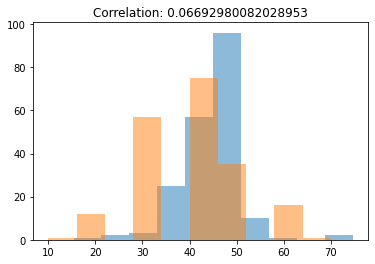

In [293]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

In [297]:
zscore_range=np.linspace(-0.5,0.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS_005:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [329]:
for index,entry in ms_data_comp[sig_sweet_CAS_005].loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

for index,entry in ms_data_comp[sig_sweet_CAS_005].loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  50
prediction score for sweet:  60.000000000000014
panelist score for sweet:  30
prediction score for sweet:  31.48627671650041


Text(0.5, 1.0, 'Correlation: 0.10494346220357609')

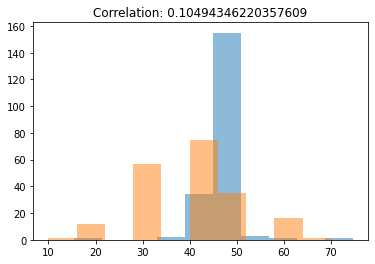

In [298]:
predictions = []
for index, row in ms_data_comp[sig_sweet_CAS_005].iterrows():
    for cas in sig_sweet_CAS_005:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

In [325]:
#7 
zscore_range=np.linspace(-1.5,1.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS_005:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(7)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(7)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

Text(0.5, 1.0, 'Correlation: 0.013340013711391293')

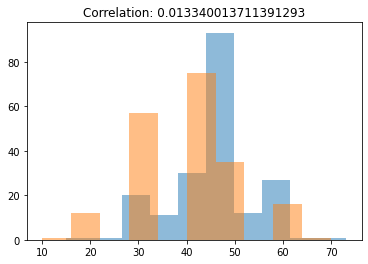

In [331]:
predictions = []
for index, row in ms_data_comp[sig_sweet_CAS_005].iterrows():
    for cas in sig_sweet_CAS_005:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])
    

references = np.array(panelist_data_comp['Sweet'])
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

In [356]:
compare_df = pd.DataFrame(index=panelist_data_comp['Sweet'].index, columns = ["panelist","predictions"])
compare_df["panelist"] = panelist_data_comp["Sweet"]
compare_df["predictions"] = predictions
compare_df

,panelist,predictions
samplekey,,
000656,30,46.920761
000657,30,45.000000
000658,40,60.000000
000838,50,60.000000
000839,50,44.536095
...,...,...
000925,30,30.000000
000926,40,33.698467
000927,50,33.583787


### 7 parameters

for each cas number we create an antecedent object, inlcuding the cas number and values in the zscore range, meaning 25 numbers between -3 and 3. This will be than splitted into 7 areas representing dismal to esxcellent depending on the value which is illustrated in figure 4. The same was done for our Consequent, our output, which is the osa e.g. sweet which is a value between 0 and 100. This again in spliite into those 7 defined areas. 
After that we create the rules saying that one cas intensity has a specific value it will contribute in the overal score for our flavor. E.g. if our input intensity for a specific cas is over 2 than it contributes to a high score of the flavor specific osa. after defining these rules for every cas number the fuzzy control system is set up. 

In [16]:
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(7)
    
    cas_antecedents.append( cas_antecedent) 
    
#osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')

osa_sweet.automf(7)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


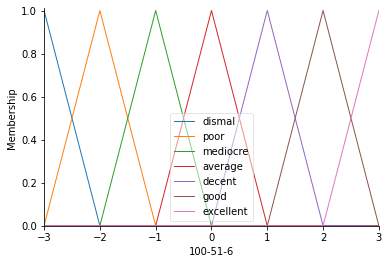

In [21]:
cas_antecedents[0].view()

In [17]:
rule_list = []
def rule_maker(cas_sweet):
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))



In [18]:
for cas_antecedent in cas_antecedents:
    rule_maker(cas_antecedent)

In [19]:
fuzzy_ctrl = ctrl.ControlSystem(rule_list)

In [20]:
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [123]:
ms_data['96-48-0']

sample_key
000920    0.0
000922    0.0
000927    0.0
000911    0.0
000925    0.0
         ... 
000596    0.0
000804    0.0
000853    0.0
000931    0.0
QC        0.0
Name: 96-48-0, Length: 239, dtype: float64

In [124]:
sweet_test.loc['000839'].fillna(0)

100-51-6     -1.137804
101-97-3     -0.394205
10486-19-8   -0.816495
106-25-2     -0.202080
106-70-7     -0.196431
                ...   
94-59-7      -0.130586
95-93-2      -2.212036
96-48-0       0.000000
97-62-1      -0.803851
98-01-1       0.000000
Name: 000839, Length: 61, dtype: float64

panelist score for sweet:  50
prediction score for sweet:  41.00092345943133


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


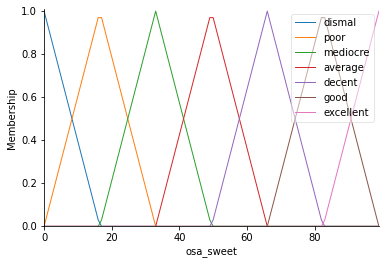

In [125]:

for index, intensitiy in sweet_test.loc['000839'].fillna(0).items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  50
prediction score for sweet:  49.78072731494908


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


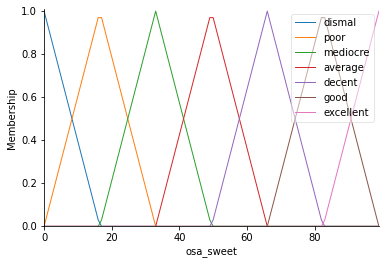

In [126]:

for index, intensitiy in sweet_ms_df.loc['000839'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  60
prediction score for sweet:  56.27011732333022


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


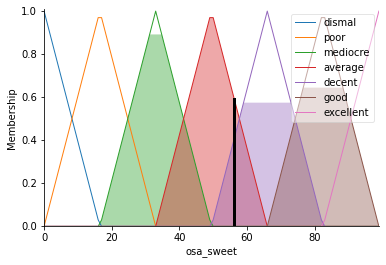

In [74]:
for index, intensitiy in sweet_ms_df.loc['000425'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000425']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

In [92]:
zscore_range=np.linspace(-1.5,1.5,732) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents_2 = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(7)
    
    cas_antecedents_2.append( cas_antecedent) 
    
#osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')

osa_sweet.automf(7)

rule_list_2 = []
def rule_maker(cas_sweet):
    rule_list_2.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list_2.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list_2.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list_2.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list_2.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list_2.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list_2.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))

for cas_antecedent in cas_antecedents_2:
    rule_maker(cas_antecedent)
fuzzy_ctrl_2 = ctrl.ControlSystem(rule_list_2)
fuzzy_1 = ctrl.ControlSystemSimulation(fuzzy_ctrl_2)

panelist score for sweet:  60
prediction score for sweet:  48.12334519333842


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


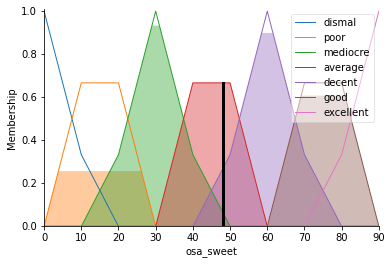

In [56]:
for index, intensitiy in sweet_ms_df.loc['000425'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000425']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  50
prediction score for sweet:  46.812096695604495


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


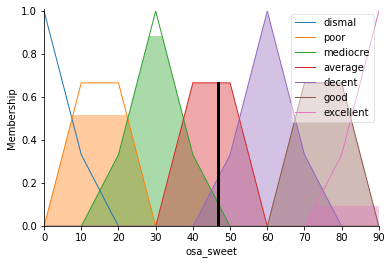

In [75]:

for index, intensitiy in sweet_ms_df.loc['000839'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  50
prediction score for sweet:  93.48990825688072


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


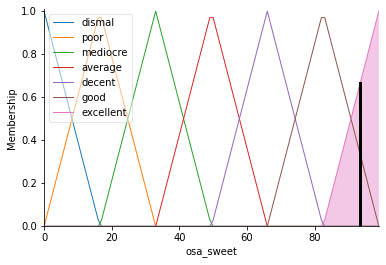

In [24]:

for index, intensitiy in sweet_ms_df.loc['000839'].items():
    fuzzy.input[index] = 33
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

(array([ 2., 10., 15., 21.,  6.,  6.,  0.,  0.,  0.,  1.]),
 array([-0.89162031, -0.63800308, -0.38438585, -0.13076862,  0.1228486 ,
         0.37646583,  0.63008306,  0.88370028,  1.13731751,  1.39093474,
         1.64455196]),
 <BarContainer object of 10 artists>)

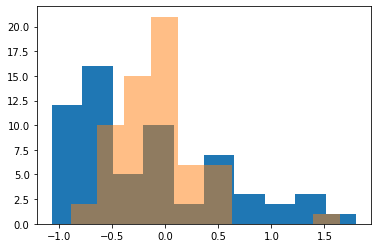

In [76]:
plt.hist(sweet_ms_df.loc['000656'])
plt.hist(sweet_ms_df.loc['000425'], alpha=0.5)

panelist score for sweet:  30
prediction score for sweet:  56.4148894324869


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


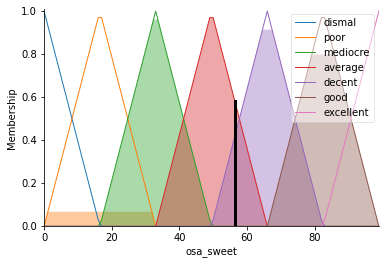

In [91]:
for index, intensitiy in sweet_ms_df.loc['000656'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000656']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

(array([ 3.,  3.,  9., 10., 13., 17.,  2.,  0.,  0.,  4.]),
 array([-2.74635305, -2.47171775, -2.19708244, -1.92244714, -1.64781183,
        -1.37317653, -1.09854122, -0.82390592, -0.54927061, -0.27463531,
         0.        ]),
 <BarContainer object of 10 artists>)

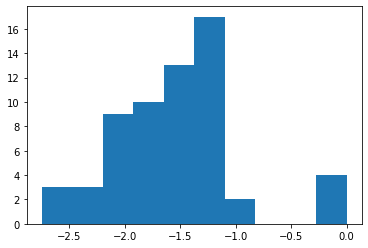

In [86]:
plt.hist(sweet_ms_df.min())

(array([ 4.,  0.,  3.,  7.,  7., 14.,  8., 14.,  2.,  2.]),
 array([0.        , 0.66965148, 1.33930295, 2.00895443, 2.6786059 ,
        3.34825738, 4.01790885, 4.68756033, 5.35721181, 6.02686328,
        6.69651476]),
 <BarContainer object of 10 artists>)

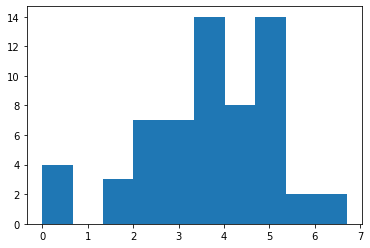

In [87]:
plt.hist(sweet_ms_df.max())

In [138]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.158771,0.895271,0.946861,0.819830,1.523904,1.523904,1.089262,1.158771,1.158771,0.895271,...,1.192345,1.523904,0.946861,1.289678,1.289678,1.012158,1.523904,1.523904,1.192345,1.124045
000922,0.916172,0.736523,0.973346,1.057127,1.579881,1.579881,1.165686,0.916172,0.916172,0.736523,...,0.877381,1.579881,0.973346,1.240674,1.240674,1.379843,1.579881,1.579881,0.877381,1.130342
000927,0.931354,0.735943,1.273055,1.348861,1.487501,1.487501,1.231637,0.931354,0.931354,0.735943,...,1.002939,1.487501,1.273055,1.204434,1.204434,1.180231,1.487501,1.487501,1.002939,0.995580
000911,0.867721,0.596470,1.236200,1.334076,1.742538,1.742538,1.312335,0.867721,0.867721,0.596470,...,1.114597,1.742538,1.236200,1.109609,1.109609,1.646824,1.742538,1.742538,1.114597,1.160102
000925,0.934255,0.796164,1.017651,1.176241,1.594876,1.594876,1.131459,0.934255,0.934255,0.796164,...,0.888183,1.594876,1.017651,1.296092,1.296092,1.294251,1.594876,1.594876,0.888183,1.070498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,1.033366,1.250555,0.628452,0.596864,0.879084,0.879084,0.883064,1.033366,1.033366,1.250555,...,0.877712,0.879084,0.628452,1.097687,1.097687,0.666417,0.879084,0.879084,0.877712,0.951425
000804,0.937218,1.116034,0.783412,1.058816,1.091539,1.091539,0.921019,0.937218,0.937218,1.116034,...,0.710260,1.091539,0.783412,0.728418,0.728418,0.816580,1.091539,1.091539,0.710260,1.049668
000853,1.511364,0.907463,1.119766,0.986312,1.233151,1.233151,0.769989,1.511364,1.511364,0.907463,...,1.213674,1.233151,1.119766,0.421277,0.421277,0.716920,1.233151,1.233151,1.213674,1.099703


(array([414., 246.,  65.,   5.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  2.32970324,  4.65940647,  6.98910971,  9.31881295,
        11.64851618, 13.97821942, 16.30792266, 18.63762589, 20.96732913,
        23.29703237]),
 <BarContainer object of 10 artists>)

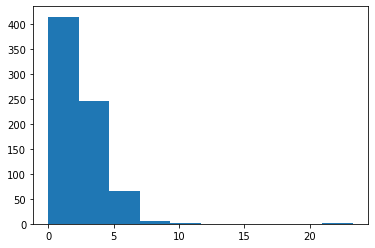

In [90]:
plt.hist(ms_data.max())

In [137]:
sweet_ms_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,78-36-4,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,0.145072,-0.402118,-0.158332,-0.282855,-1.021965,-0.454564,1.347565,-0.434720,-0.542226,0.342638,...,-0.376592,1.918544,-0.102087,0.335320,-0.402118,0.183367,1.756254,0.0,-0.196933,0.0
000922,-0.006007,0.054447,0.789525,-0.835267,0.352176,-0.793731,1.183626,-0.541566,0.487139,-0.638824,...,-0.433068,0.755909,0.881869,-0.524925,0.054447,0.704514,1.012943,0.0,0.064097,0.0
000927,-0.550657,1.086486,0.274945,-0.837286,-0.582593,-0.530549,1.062388,0.215911,0.665305,-0.577403,...,-0.415219,0.558190,-0.128824,-0.181994,1.086486,0.838267,1.056028,0.0,-0.439821,0.0
000911,-0.160641,0.036586,1.477778,-1.322621,0.310314,-0.105064,0.745156,0.389568,1.075946,-0.834838,...,0.334839,0.422073,0.336051,0.122970,0.036586,0.863101,2.377540,0.0,1.214402,0.0
000925,-0.582492,0.354348,0.568877,-0.627727,0.296694,-0.567692,1.369022,-0.143846,0.072743,-0.565667,...,-0.563842,0.925502,0.588295,-0.495422,0.354348,0.728937,1.164226,0.0,-0.210043,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,-0.376903,-0.657316,-1.049621,0.953460,-1.136752,-0.290011,0.705273,-1.196877,-1.219282,-0.164701,...,-1.057526,0.342758,1.865231,-0.524021,-0.657316,-0.401865,0.822045,0.0,-0.675180,0.0
000804,-0.649973,-0.445393,-0.662514,0.485352,1.491073,-0.341741,-0.530095,0.049392,0.015918,-0.553682,...,-0.051101,-0.524397,-0.033080,-0.981373,-0.445393,-0.009716,-0.759068,0.0,-0.090074,0.0
000853,0.212933,0.813260,-0.919430,-0.240430,1.320896,0.632151,-1.557615,0.242754,-0.361760,1.769095,...,0.460432,-1.123340,-0.714183,0.393576,0.813260,-0.105301,-1.600206,0.0,0.660416,0.0


In [77]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])



(array([ 1.,  9., 21., 37., 30., 56., 41., 30., 11.,  3.]),
 array([41.97711042, 43.84686235, 45.71661428, 47.58636621, 49.45611814,
        51.32587007, 53.195622  , 55.06537393, 56.93512586, 58.80487779,
        60.67462972]),
 <BarContainer object of 10 artists>)

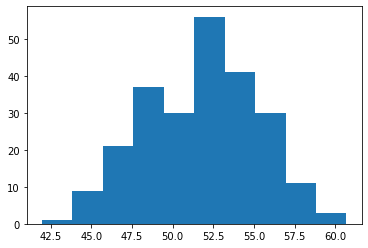

In [133]:
plt.hist(predictions)    
# all predicitions are between 40 and 60 ? 

In [129]:
references = np.array(panelist_data_comp['Sweet'])


(array([ 1.,  0.,  0.,  0., 12.,  0.,  0.,  0., 57.,  0.,  0.,  0., 75.,
         0.,  0.,  0., 35.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  1.]),
 array([10. , 12.4, 14.8, 17.2, 19.6, 22. , 24.4, 26.8, 29.2, 31.6, 34. ,
        36.4, 38.8, 41.2, 43.6, 46. , 48.4, 50.8, 53.2, 55.6, 58. , 60.4,
        62.8, 65.2, 67.6, 70. ]),
 <BarContainer object of 25 artists>)

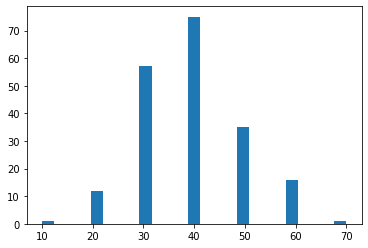

In [131]:
plt.hist(references,25)

In [135]:
len(predictions)

239

In [136]:
len(references)

197

ValueError: x and y must have same first dimension, but have shapes (239,) and (197,)

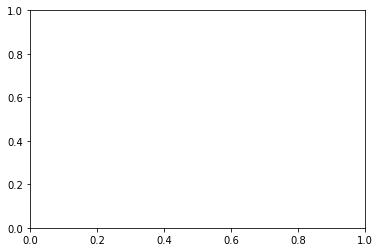

In [132]:
plt.plot(predictions, references,'o')
plt.title("Correlation: "+ str(np.corrcoef(predictions, references)[0,1]))


### Try and Error:

cas_001 : -3
cas_002 : -3
cas_003 : -3

5.999999999999999


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


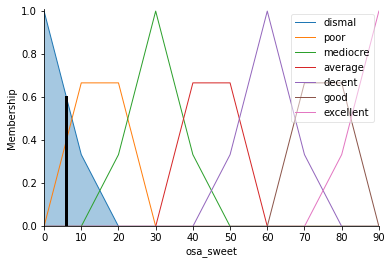

In [347]:
# basic example 

cas_range=np.linspace(-3,3,197)
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 
#cas_range = np.array(ms_data_comp['6485-40-1'])
             
cas_001 = ctrl.Antecedent(zscore_range, 'cas_001')
cas_002 = ctrl.Antecedent(zscore_range, 'cas_002')
cas_003 = ctrl.Antecedent(zscore_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(7)
cas_002.automf(7)
cas_003.automf(7)

#osa_sweet = ctrl.Consequent(cas_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(7)


rule_list = []
def rule_maker(cas_sweet):
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))

rule_maker(cas_001)
rule_maker(cas_002)
rule_maker(cas_003)

fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


fuzzy.input['cas_001'] = -3
fuzzy.input['cas_002'] = -3
fuzzy.input['cas_003'] = -3
print(fuzzy.input)
# Crunch the numbers
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=fuzzy)